# Exercise 5: Time-delay Embedding (Task 4: Part 2 (Lorenz))

In [1]:
# All imports
import numpy as np
from utils import *
from scipy.integrate import solve_ivp

# TODO: Import necessary python files to simulate the lorenz attractor from the previous exercise


### TODO: Generate data for Lorenz attractor (using prev exercise)

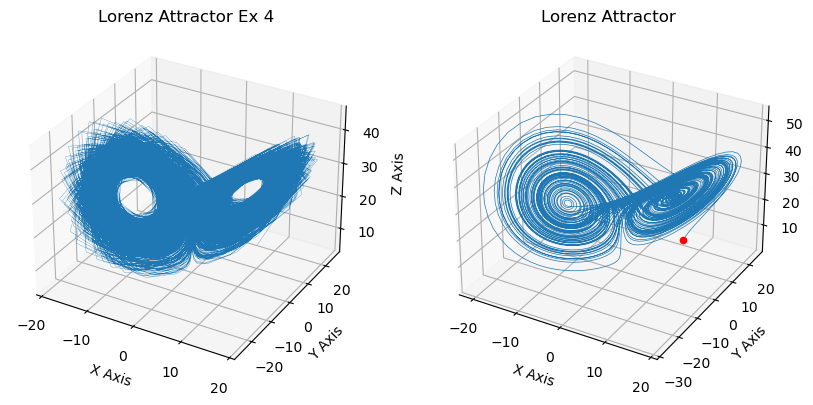

In [27]:
# TODO: Generate lorenz_dataectory data by simulating the Lorenz attractor

# TODO: Visualize lorenz attractor

# Define Lorenz system
def lorenz (t, state , sigma , beta , rho ):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * ( rho - z) - y
    dz = x * y - beta * z
    return [dx , dy , dz]

 # Parameters and initial state
sigma , beta , rho = 10, 8/3 , 28
initial_state = [10 , 10, 10]

 # Solve ODE
sol = solve_ivp(lorenz , [0, 1000] , initial_state , args =( sigma , beta , rho ), t_eval =np.
linspace (0, 1000 , 10000) )

# implementation on matplotlib page
def lorenz_(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (10, 10, 10)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz_(xyzs[i]) * dt

 # Plot trajectory
fig = plt.figure('Lorenz attractors', (10,5))
ax = fig.add_subplot(121 , projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor Ex 4")

# Plot
ax_2 = fig.add_subplot(122,projection='3d')
ax_2.scatter(10,10,10, color='r')
ax_2.plot(*xyzs.T,lw=0.5)
ax_2.set_xlabel("X Axis")
ax_2.set_ylabel("Y Axis")
ax_2.set_zlabel("Z Axis")
ax_2.set_title("Lorenz Attractor")

plt.show()

### TODO: Create and visualize time-delayed x coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 2500.0)

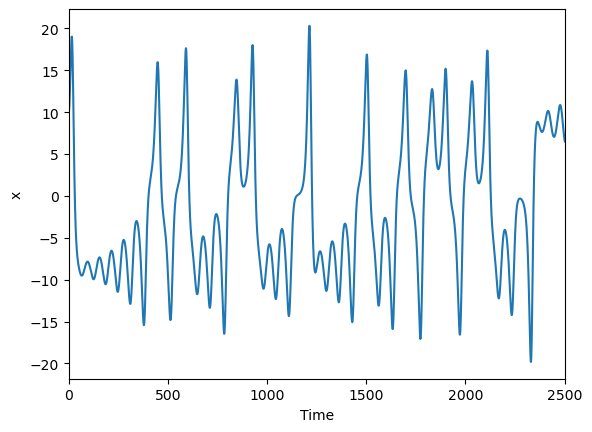

In [5]:
x = xyzs[:,0]
time = np.arange(len(x))
plt.plot(time,x)
plt.xlabel("Time")
plt.ylabel("x")
plt.xlim(0,2500)

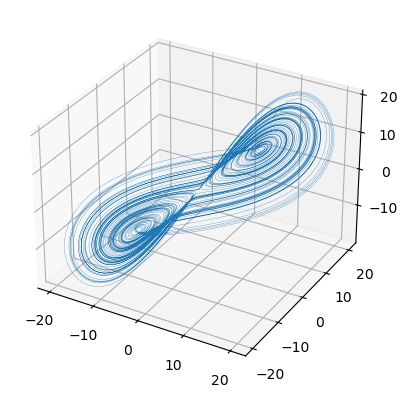

In [15]:
# Hint: Use method time_delay from utils.py
delayed_x = time_delay(xyzs,0, delta_t=5,out_dim=3)
x_2 = delayed_x[:,2]
x_1 = delayed_x[:,1]
x_0 = delayed_x[:,0]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_0,x_1, x_2, lw=0.2)
plt.show()

### TODO: Create and visualize time-delayed z coordinates from Lorenz data in a 3-d Euclidean space


(0.0, 2500.0)

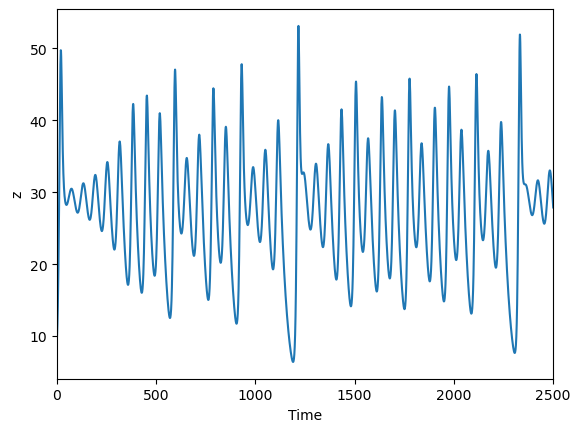

In [21]:
z = xyzs[:,2]
time = np.arange(len(z))
plt.plot(time,z)
plt.xlabel("Time")
plt.ylabel("z")
plt.xlim(0,2500)

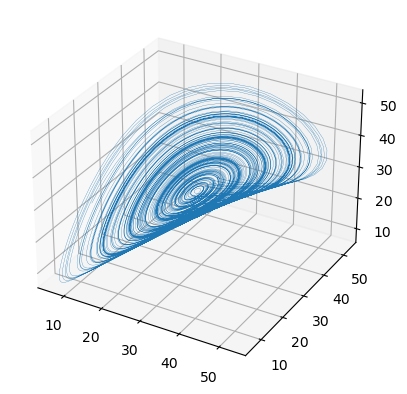

In [18]:
# Hint: Use method time_delay from utils.py
# Hint: Use method time_delay from utils.py
delayed_z = time_delay(xyzs,2, delta_t=5,out_dim=3)
z_2 = delayed_z[:,2]
z_1 = delayed_z[:,1]
z_0 = delayed_z[:,0]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(z_0,z_1, z_2, lw=0.2)
plt.show()

### TODO: Bonus task
Approximating vector field

In [ ]:
# computing vector field v
